# Dec 28th, 2022 (SLC: cosine bluered)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
nn = 512
perc = 15
fig_dir = 'Fig2_OCs'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Fig2_OCs

## Prepare (512)

In [3]:
num_k = 7
mice = Mice(nn, load_parcel=True)

## Results

In [4]:
%%time

results = similiarity_results(
    mice=mice,
    perc=perc,
    num_k=num_k,
    merge_thres=0.444,
    n_resamples=None,
)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 15.2 s, sys: 19.8 s, total: 35 s
Wall time: 1min 24s


['bt_dict', 'props_bo', 'props_ca', 'pi_sorted', 'sim', 'sim_overall']

## Save dir

In [5]:
save_dir = pjoin(fig_dir, f"K{num_k}")
os.makedirs(save_dir, exist_ok=True)
print(save_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Fig2_OCs/K7

## OCs

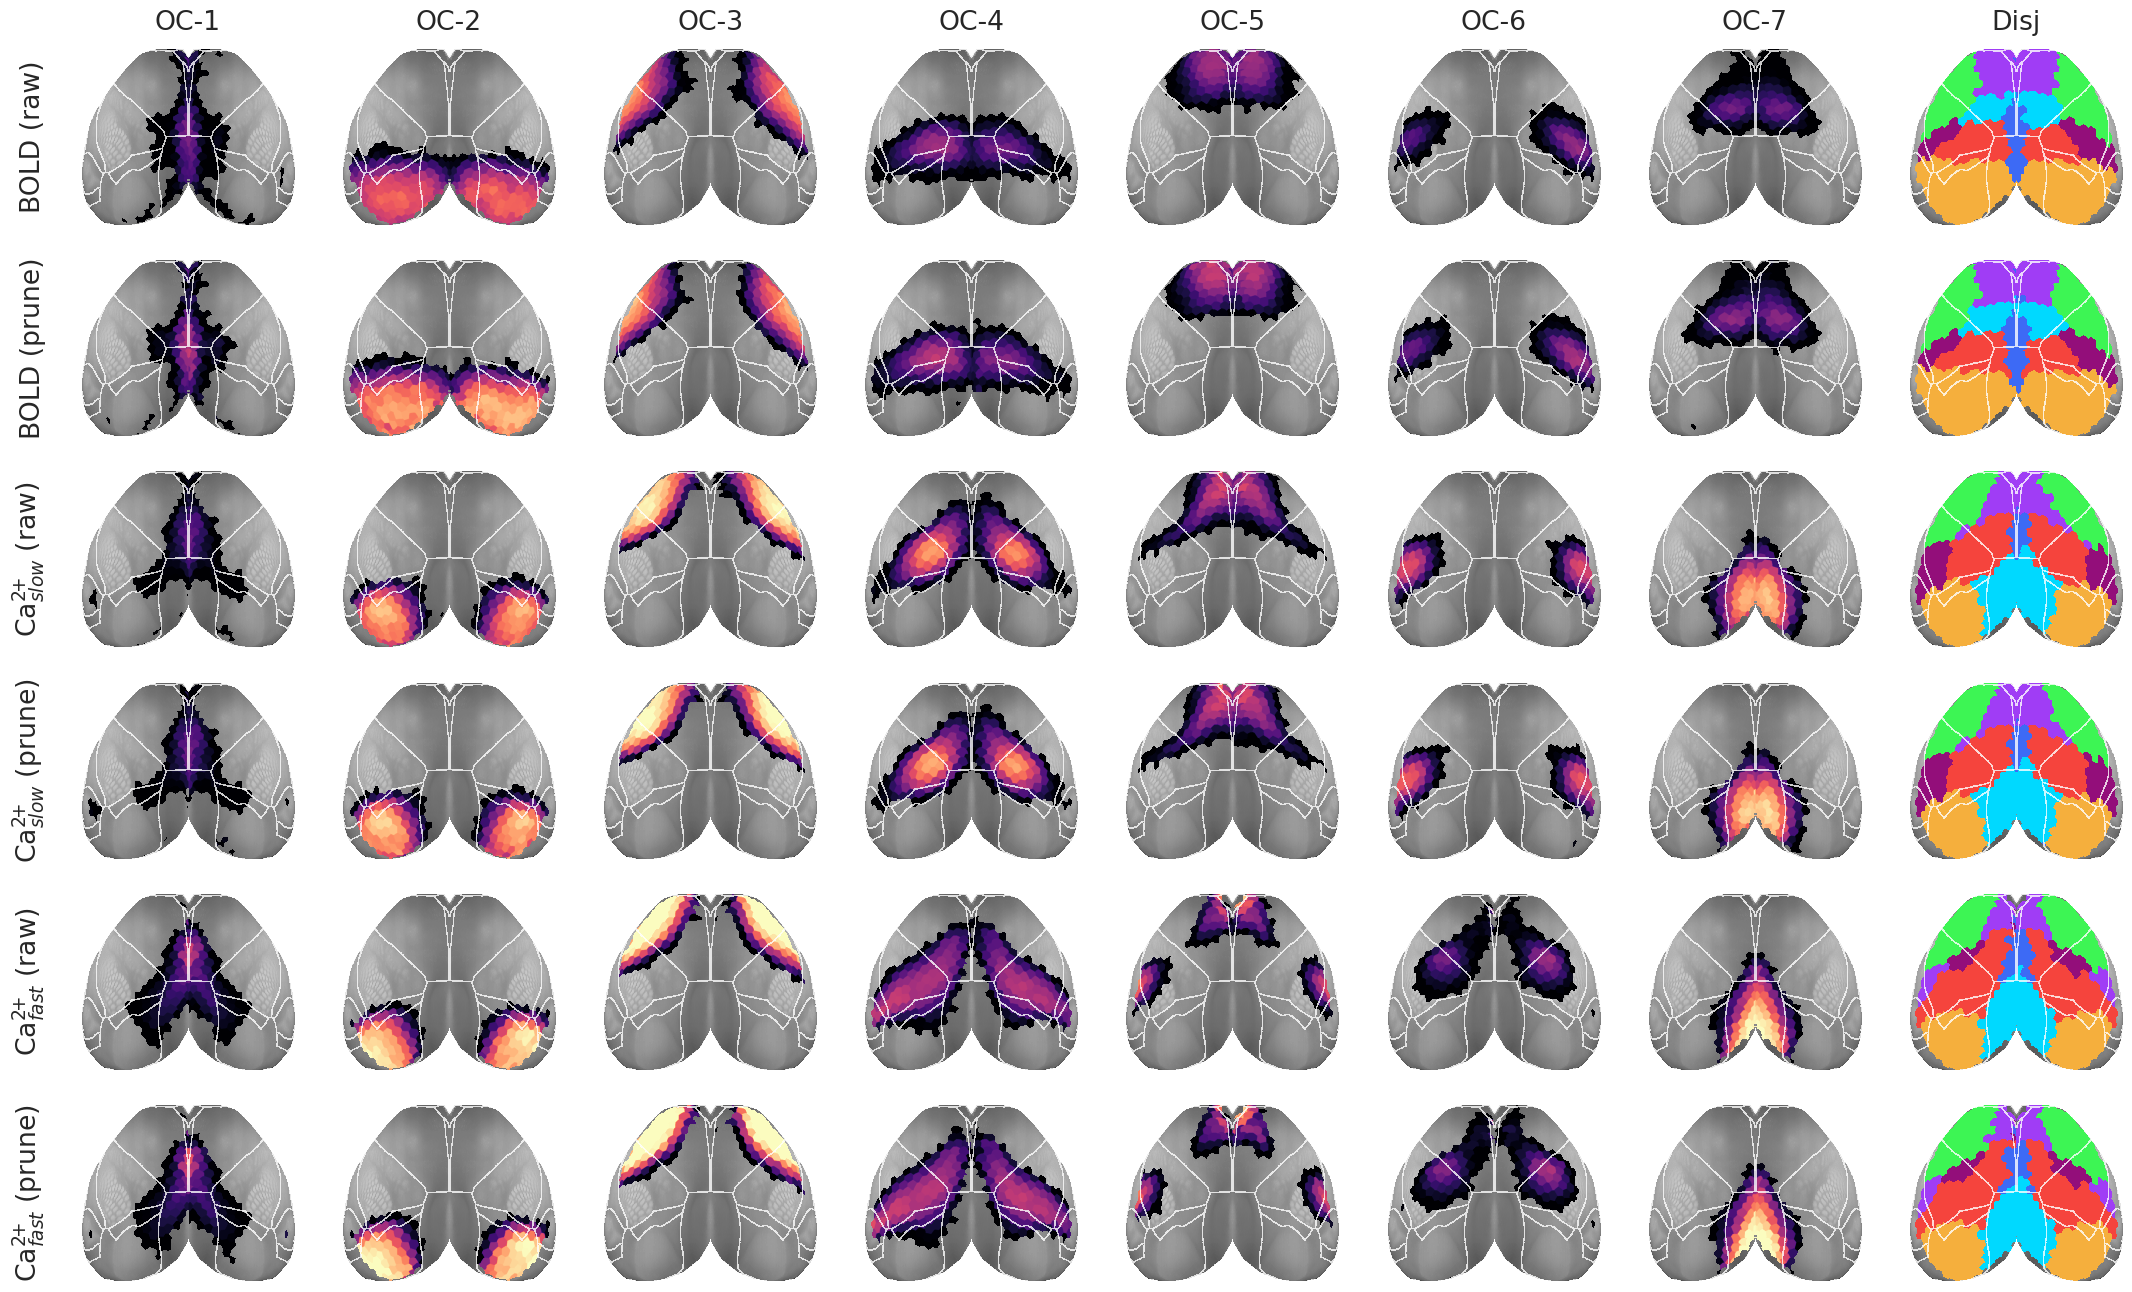

In [7]:
data2show = {}
for key, o in results['bt_dict'].items():
    data2show = {
        **data2show,
        f'{key} (raw)\n': avg(o.run_pi),
        f'{key} (prune)\n': avg(o.pi_prune),
    }
_ = bt.show(data2show, **show_kws(num_k))

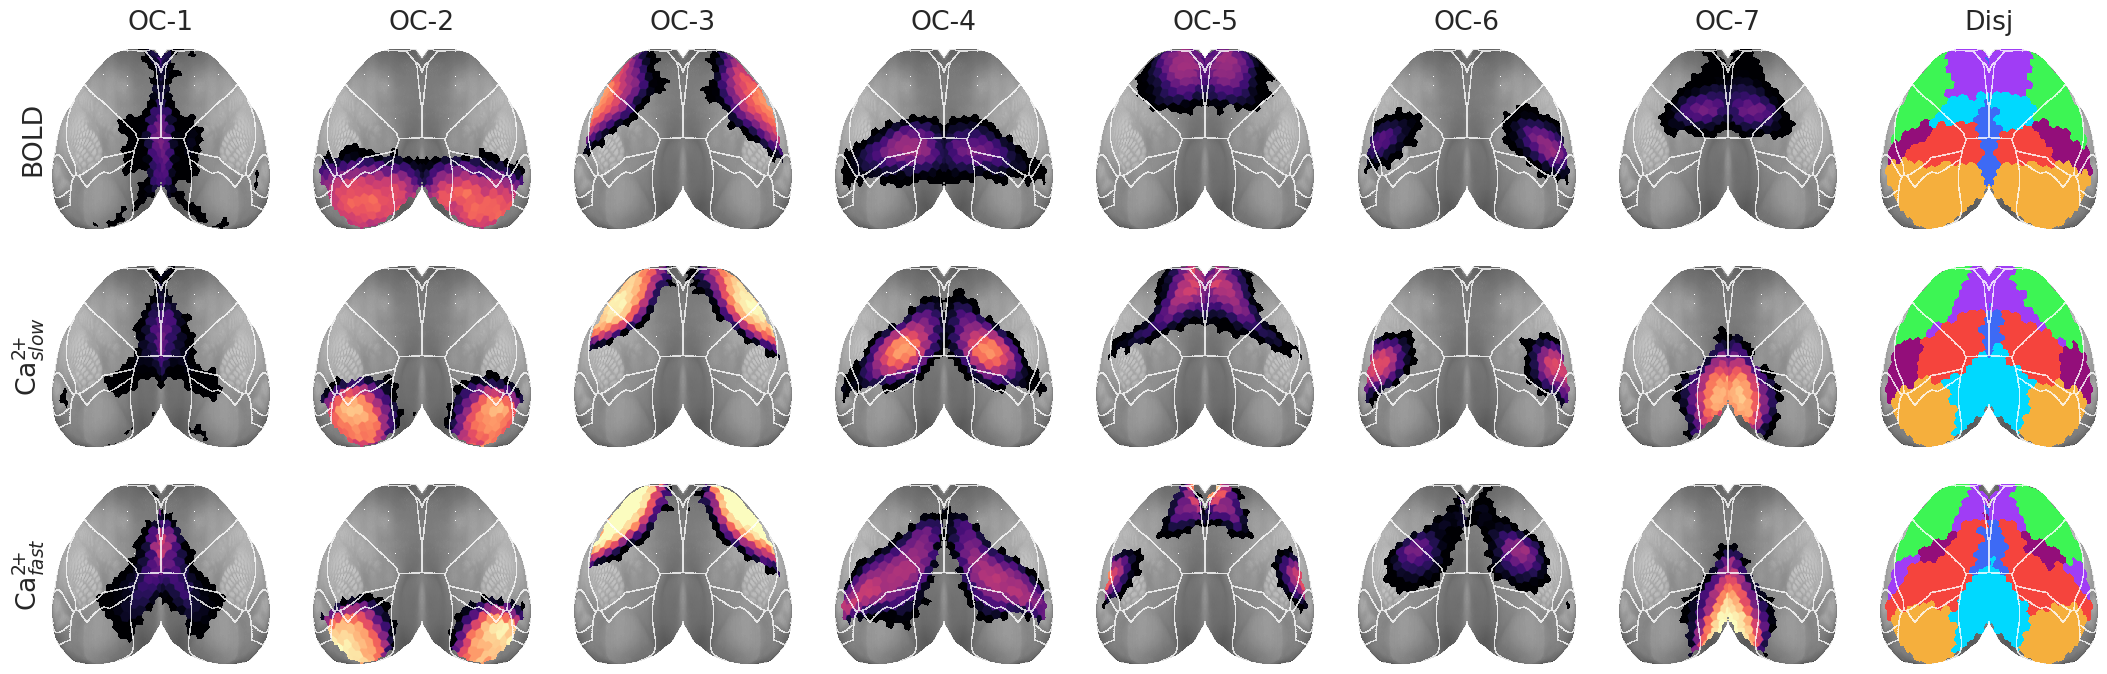

In [8]:
_ = bt.show(results['pi_sorted'], **show_kws(num_k))

### Save Cols & Indiv components

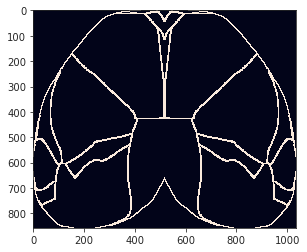

In [8]:
contour = bt.get_contour(0.2, True)
plt.imshow(contour);

In [9]:
from figures.fig_ocs import plot_ocs as go

kwargs = {
    'base': bt,
    'vmin': 0.2,
    'vmax': 0.9,
    'cbar': False,
    'cmap': 'magma',
    'contour': contour,
    'contour_alpha': 0.8,
    'interp': 'antialiased',
    'mask_thres': 1 / num_k,
}
go(
    results['pi_sorted'],
    save_dir=save_dir,
    kws_fig=kws_fig,
    mode2lbl={
        BOLD: 'BOLD',
        CAS: 'CAS',
        CAF: 'CAF'},
    **kwargs,
)

## Similarity plots

### Plot heatmap

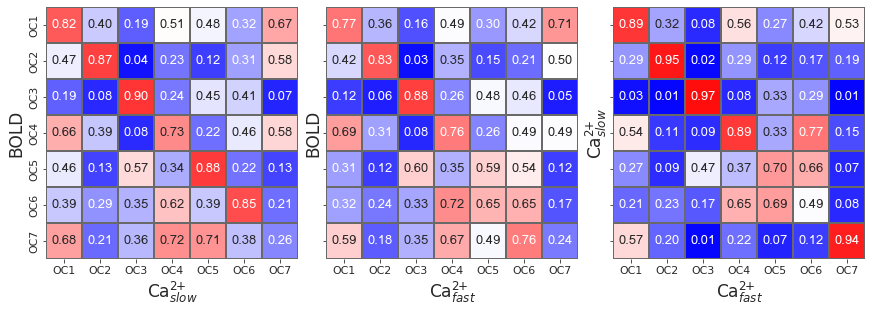

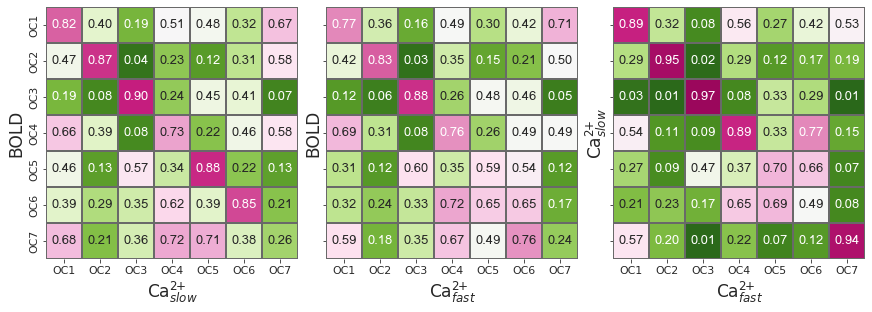

In [9]:
from figures.fig_ocs import similiarity_heatmap as go
fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0, cmap='bwr')
fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0, cmap='PiYG_r')

# fig.savefig(pjoin(save_dir, 'sim_hm.pdf'), **kws_fig)
# fig.savefig(pjoin(save_dir, 'sim_hm.png'), **kws_fig)

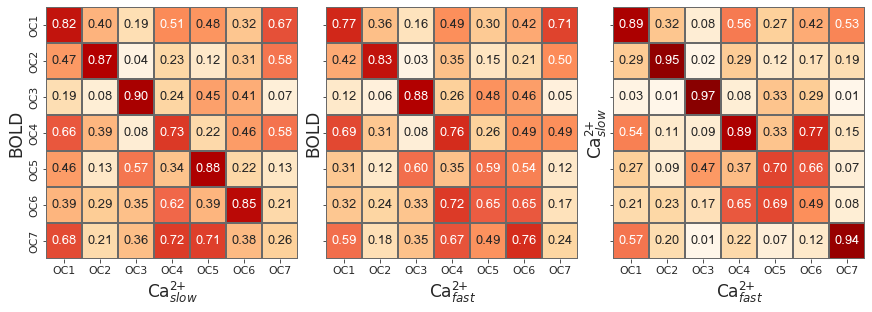

In [10]:
fig, _ = go(results['sim'], results['sim_overall'], False, vmin=0)

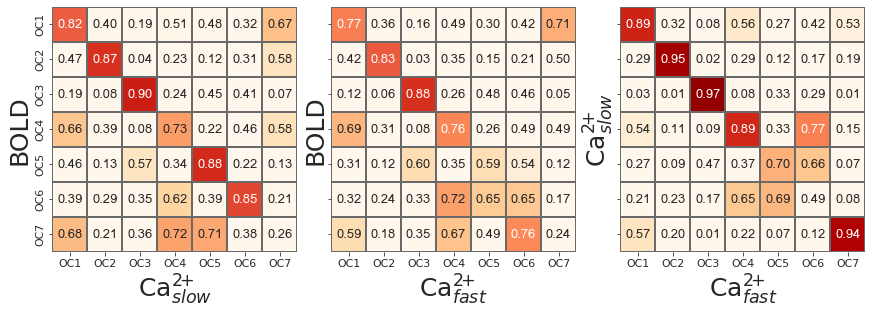

In [13]:
from figures.fig_ocs import similiarity_heatmap as go
fig, _ = go(results['sim'], results['sim_overall'], False, True, label_fontsize=25)

fig.savefig(pjoin(save_dir, 'sim_hm_poster.pdf'), **kws_fig)
fig.savefig(pjoin(save_dir, 'sim_hm_poster.png'), **kws_fig)

### *** Different colormaps (start)

In [11]:
_dir = pjoin(fig_dir, 'CMAPs')
os.makedirs(_dir, exist_ok=True)
print(_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/Fig2_OCs/CMAPs

In [12]:
%%time

for cmap in plt.colormaps():
    for lw in [0, 0.5, 0.8]:
        if lw == 0:
            fig, _ = go(
                results['sim'], results['sim_overall'], False, False,
                cmap=cmap,
                linewidths=lw,
            )
            fig.suptitle(f'{cmap};   lw = {lw}', y=1.0, fontsize=17)
            fig.savefig(pjoin(_dir, f'{cmap}_lw{lw}.pdf'), **kws_fig)
        else:
            for lc in ['w', 'dimgrey']:
                fig, _ = go(
                    results['sim'], results['sim_overall'], False, False,
                    cmap=cmap,
                    linewidths=lw,
                    linecolor=lc,
                )
                fig.suptitle(f'{cmap};   lw = {lw}, lc = {lc}', y=1.0, fontsize=17)
                fig.savefig(pjoin(_dir, f'{cmap}_lw{lw}_lc{lc}.pdf'), **kws_fig)

CPU times: user 19min 29s, sys: 31.7 s, total: 20min 1s
Wall time: 20min 2s


### *** Different colormaps (End)